In [461]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import pylab
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from mpl_toolkits.axes_grid.anchored_artists import AnchoredAuxTransformBox

In [186]:
# Import SPI Data
df1 = pd.read_csv('/Users/steven_esp12/Downloads/2017 results.csv', index_col=0)

# Import Heritage Foundation Data
df2 = pd.read_csv('/Users/steven_esp12/Downloads/index2018_data.csv', index_col=0)

# Merging datasets
df = pd.merge(df1, df2, on='Country')

In [468]:
df1.head()

,Country Code,Social Progress Index,Basic Human Needs,Foundations of Wellbeing,Opportunity,Nutrition and Basic Medical Care,Water and Sanitation,Shelter,Personal Safety,Access to Basic Knowledge,...,Globally ranked universities,Percentage of tertiary students enrolled in globally ranked universities,Depth of food deficit - capped,Adult literacy rate - capped,Secondary school enrollment - capped,Gender parity in secondary enrollment - difference from parity,Mobile telephone subscriptions - capped,Greenhouse gas emissions - capped,Globally ranked universities - bucketed,Percentage of tertiary students enrolled in globally ranked universities - bucketed
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,35.66,42.65,38.00,26.34,72.74,29.33,22.92,45.63,53.37,...,0.0,0.00,173.0,38.17,55.64,0.44,61.58,544.79,0.0,0.0
Albania,ALB,70.97,85.53,78.35,49.04,98.17,90.69,80.45,72.82,95.99,...,0.0,0.00,8.0,97.55,95.77,0.06,100.00,257.69,0.0,0.0
Algeria,DZA,65.41,78.15,77.09,40.98,95.01,81.23,70.58,65.77,93.31,...,1.0,0.03,20.0,79.61,99.86,0.04,100.00,380.96,1.0,1.0
Angola,AGO,40.73,44.37,48.76,29.05,69.33,27.63,28.49,52.04,60.59,...,0.0,0.00,90.0,71.16,28.90,0.35,60.84,995.89,0.0,0.0
Argentina,ARG,75.90,81.71,79.41,66.58,97.34,98.32,67.25,63.92,97.23,...,20.0,0.23,8.0,98.09,100.00,0.07,100.00,NaN,6.0,4.0


In [469]:
df2.head()

,WEBNAME,Region,World Rank,Region Rank,2018 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,...,Country.1,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Afghanistan,Asia-Pacific,154.0,38.0,51.3,17.9,28.2,26.2,91.8,79.3,...,Afghanistan,33.4,$64.10,1.5,4.4,"$1,918.60",8.5,4.4,99.6,8.3
Albania,Albania,Europe,65.0,32.0,64.5,54.1,25.4,39.9,85.1,72.7,...,Albania,2.9,$34.20,2.6,2.0,"$11,840.20",16.3,1.3,"1,124.30",71.5
Algeria,Algeria,Middle East / North Africa,172.0,14.0,44.7,27.8,35.2,29.0,74.0,45.9,...,Algeria,40.8,$612.50,3.7,3.6,"$15,026.50",11.2,6.4,"1,546.00",20.4
Angola,Angola,Sub-Saharan Africa,164.0,40.0,48.6,36.0,25.4,18.9,82.4,69.1,...,Angola,27.4,$187.30,3,4.0,"$6,844.40",6.6,32.4,"14,363.60",71.9
Argentina,Argentina,Americas,144.0,26.0,52.3,40.8,44.5,32.6,65.7,55.6,...,Argentina,43.6,$874.10,1.2,-0.2,"$20,047.50",6.6,58.4,"5,745.20",51.3


In [187]:
df.head()

,Country Code,Social Progress Index,Basic Human Needs,Foundations of Wellbeing,Opportunity,Nutrition and Basic Medical Care,Water and Sanitation,Shelter,Personal Safety,Access to Basic Knowledge,...,Country.1,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,35.66,42.65,38.00,26.34,72.74,29.33,22.92,45.63,53.37,...,Afghanistan,33.4,$64.10,1.5,4.4,"$1,918.60",8.5,4.4,99.6,8.3
Albania,ALB,70.97,85.53,78.35,49.04,98.17,90.69,80.45,72.82,95.99,...,Albania,2.9,$34.20,2.6,2.0,"$11,840.20",16.3,1.3,"1,124.30",71.5
Algeria,DZA,65.41,78.15,77.09,40.98,95.01,81.23,70.58,65.77,93.31,...,Algeria,40.8,$612.50,3.7,3.6,"$15,026.50",11.2,6.4,"1,546.00",20.4
Angola,AGO,40.73,44.37,48.76,29.05,69.33,27.63,28.49,52.04,60.59,...,Angola,27.4,$187.30,3,4.0,"$6,844.40",6.6,32.4,"14,363.60",71.9
Argentina,ARG,75.90,81.71,79.41,66.58,97.34,98.32,67.25,63.92,97.23,...,Argentina,43.6,$874.10,1.2,-0.2,"$20,047.50",6.6,58.4,"5,745.20",51.3


In [188]:
# Cleaning datasets: removing commas and dollar signs
df = df.replace([',','\$'],'', regex=True)
df.head()

,Country Code,Social Progress Index,Basic Human Needs,Foundations of Wellbeing,Opportunity,Nutrition and Basic Medical Care,Water and Sanitation,Shelter,Personal Safety,Access to Basic Knowledge,...,Country.1,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,35.66,42.65,38.00,26.34,72.74,29.33,22.92,45.63,53.37,...,Afghanistan,33.4,64.10,1.5,4.4,1918.60,8.5,4.4,99.6,8.3
Albania,ALB,70.97,85.53,78.35,49.04,98.17,90.69,80.45,72.82,95.99,...,Albania,2.9,34.20,2.6,2.0,11840.20,16.3,1.3,1124.30,71.5
Algeria,DZA,65.41,78.15,77.09,40.98,95.01,81.23,70.58,65.77,93.31,...,Algeria,40.8,612.50,3.7,3.6,15026.50,11.2,6.4,1546.00,20.4
Angola,AGO,40.73,44.37,48.76,29.05,69.33,27.63,28.49,52.04,60.59,...,Angola,27.4,187.30,3,4.0,6844.40,6.6,32.4,14363.60,71.9
Argentina,ARG,75.90,81.71,79.41,66.58,97.34,98.32,67.25,63.92,97.23,...,Argentina,43.6,874.10,1.2,-0.2,20047.50,6.6,58.4,5745.20,51.3


In [189]:
# Evaluating types for each columns
cols = df.columns

for i in range(0, len(cols)):
    print(str(cols[i]) + ": \n" + str(type(df[(cols[i])][1])) + "\n")

Country Code: 
<class 'str'>

Social Progress Index: 
<class 'numpy.float64'>

Basic Human Needs: 
<class 'numpy.float64'>

Foundations of Wellbeing: 
<class 'numpy.float64'>

Opportunity: 
<class 'numpy.float64'>

Nutrition and Basic Medical Care: 
<class 'numpy.float64'>

Water and Sanitation: 
<class 'numpy.float64'>

Shelter: 
<class 'numpy.float64'>

Personal Safety: 
<class 'numpy.float64'>

Access to Basic Knowledge: 
<class 'numpy.float64'>

Access to Information and Communications: 
<class 'numpy.float64'>

Health and Wellness: 
<class 'numpy.float64'>

Environmental Quality: 
<class 'numpy.float64'>

Personal Rights: 
<class 'numpy.float64'>

Personal Freedom and Choice: 
<class 'numpy.float64'>

Tolerance and Inclusion: 
<class 'numpy.float64'>

Access to Advanced Education: 
<class 'numpy.float64'>

Undernourishment: 
<class 'numpy.float64'>

Depth of food deficit: 
<class 'numpy.float64'>

Maternal mortality rate: 
<class 'numpy.float64'>

Child mortality rate: 
<class 'nu

In [190]:
# Changing types to floats for certain columns
for i in range(0, len(df)):
    df['GDP Growth Rate (%)'][i] = float(df['GDP Growth Rate (%)'][i])
    df['Unemployment (%)'][i] = float(df['Unemployment (%)'][i])
    df['FDI Inflow (Millions)'][i] = float(df['FDI Inflow (Millions)'][i])
    df['GDP per Capita (PPP)'][i] = float(df['GDP per Capita (PPP)'][i])
    df['GDP (Billions, PPP)'][i] = float(df['GDP (Billions, PPP)'][i])
    df['Population (Millions)'][i] = float(df['Population (Millions)'][i])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages

In [191]:
# Dropping redundant columns
df.drop(['Country.1', 'Country Code', 'WEBNAME', 'Region'], axis=1, inplace=True)

In [192]:
# Finally, dropping nan values (instead of imputing for the sake of practicing visualization)
df.dropna(inplace=True)

In [193]:
df.head()

,Social Progress Index,Basic Human Needs,Foundations of Wellbeing,Opportunity,Nutrition and Basic Medical Care,Water and Sanitation,Shelter,Personal Safety,Access to Basic Knowledge,Access to Information and Communications,...,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
Country,,,,,,,,,,,,,,,,,,,,,
Albania,70.97,85.53,78.35,49.04,98.17,90.69,80.45,72.82,95.99,78.81,...,30.1,2.9,34.2,2.6,2.0,11840.2,16.3,1.3,1124.3,71.5
Bangladesh,54.84,67.40,60.41,36.72,86.34,57.26,55.94,70.05,77.14,53.30,...,13.9,161.5,628.4,6.4,6.5,3890.6,4.1,6.4,2332.7,33.1
Bolivia,66.93,74.42,73.36,53.00,86.16,68.29,75.52,67.71,91.22,70.51,...,42.2,10.9,78.7,4.8,5.3,7218.5,3.7,3.6,410.1,42.1
Botswana,64.44,70.62,66.78,55.92,75.60,77.62,53.89,75.37,87.89,71.95,...,34.9,2.2,36.7,-0.3,4.2,17041.6,18.4,2.8,10.5,13.9
Brazil,73.97,76.49,79.55,65.86,97.07,86.62,73.90,48.38,94.11,76.67,...,40.5,206.1,3141.3,-3.8,-0.4,15241.7,11.5,8.7,58679.6,78.3


In [194]:
# Data is clean. Ready for data analysis
# Start by dropping the dependent variable. In this case, let's make it 'Social Progress Index'
# Name the independent variables X, dropping the dependent variable
X = df.drop('Social Progress Index', axis=1)

In [195]:
# Create a linear regression object
lm = LinearRegression()

lm.fit(X, df['Social Progress Index'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [196]:
# Print the intercept value (alpha) and the number of coefficients
print('Intercept (a):', lm.intercept_)
print('Number of coefficients', len(lm.coef_))

Intercept (a): 16.036319961812787
Number of coefficients 102


In [197]:
a = pd.DataFrame(np.array(X.columns))
a['coefficients'] = lm.coef_
a.columns = ['features', 'estimatedCoefficients']

In [198]:
# Finding the top ten coefficients
sorted(zip(a['estimatedCoefficients'], a['features']), reverse=True)[:10]

[(0.07080490978254429, 'Tolerance and Inclusion'),
 (0.07067906041759701, 'Personal Safety'),
 (0.06740824254645697, 'Shelter'),
 (0.06526489207207267, 'Access to Advanced Education'),
 (0.06312617344662551, 'Opportunity'),
 (0.060297983963542474, 'Personal Rights'),
 (0.056172104294662205, 'Personal Freedom and Choice'),
 (0.03965369555920926, 'Basic Human Needs'),
 (0.03577235760514084, 'Health and Wellness'),
 (0.026084454641863035, 'Rural access to improved water source')]

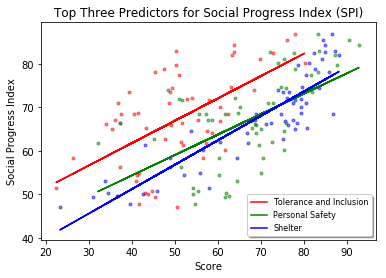

In [410]:
# Create scatter plot with matplotlib
plt.scatter(df['Tolerance and Inclusion'], df['Social Progress Index'], c='red', marker='.', alpha=0.5)
plt.scatter(df['Shelter'], df['Social Progress Index'], c='blue', marker='.', alpha=0.5)
plt.scatter(df['Personal Safety'], df['Social Progress Index'], c='green', marker='.', alpha=0.5)
plt.xlabel("Score")
plt.ylabel("Social Progress Index")
plt.title("Top Three Predictors for Social Progress Index (SPI)")

# Adding line of best fit *** WITH PYLAB *** (for tolerance and inclusion)
(m, b) = pylab.polyfit(df['Tolerance and Inclusion'], df['Social Progress Index'], 1)
lfit = pylab.polyval([m,b], df['Tolerance and Inclusion'])
pylab.plot(df['Tolerance and Inclusion'], lfit, '-k', c='red', label='Tolerance and Inclusion')

# Adding line of best fit *** WITH PYLAB *** (for access to advanced education)
(m, b) = pylab.polyfit(df['Personal Safety'], df['Social Progress Index'], 1)
lfit = pylab.polyval([m,b], df['Personal Safety'])
pylab.plot(df['Personal Safety'], lfit, '-k', c='green', label='Personal Safety')

# Adding line of best fit *** WITH PYLAB *** (for shelter)
(m, b) = pylab.polyfit(df['Shelter'], df['Social Progress Index'], 1)
lfit = pylab.polyval([m,b], df['Shelter'])
pylab.plot(df['Shelter'], lfit, '-k', c='blue', label='Shelter')

# Adding legend
pylab.legend(['Tolerance and Inclusion', 'Personal Safety', 'Shelter'], frameon = True, shadow=True, loc = 'lower right', 
            fontsize=8)

# Save the figure
plt.savefig('/Users/steven_esp12/Desktop/highpretty.png', dpi=1000)

Text(69,62,'Latin America')

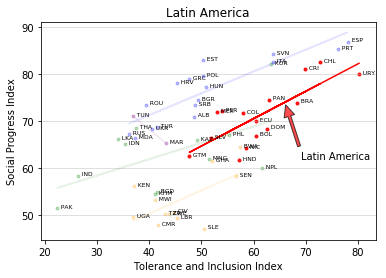

In [467]:
# Tolerance and Inclusion: Breaking up by region, emphasizing Latin American countries in the database.
# Adding list of regions back to df
region = []

for i in range(0, len(df2)):
    for j in range(0, len(df)):
            if df.index[j] == df2.index[i]:
                region.append(str(" " + df2['Region'][i]))
                
df['Region'] = region

# Making scatter plot with points based on region
for i in range(0, len(df)):
    if df['Region'][i] == ' Europe':
        plt.scatter(df['Tolerance and Inclusion'][i], df['Social Progress Index'][i], c='blue', marker='.', alpha=0.25, label='Europe')
    if df['Region'][i] == ' Asia-Pacific':
        plt.scatter(df['Tolerance and Inclusion'][i], df['Social Progress Index'][i], c='green', marker='.', alpha=0.25, label='Asia')
    if df['Region'][i] == ' Americas':
        plt.scatter(df['Tolerance and Inclusion'][i], df['Social Progress Index'][i], c='red', marker='.', alpha=0.9, label='Latin America')
    if df['Region'][i] == ' Sub-Saharan Africa':
        plt.scatter(df['Tolerance and Inclusion'][i], df['Social Progress Index'][i], c='orange', marker='.', alpha=0.25, label='Africa')
    if df['Region'][i] == ' Middle East / North Africa':
        plt.scatter(df['Tolerance and Inclusion'][i], df['Social Progress Index'][i], c='purple', marker='.', alpha=0.25, label='Middle East')

plt.xlabel("Tolerance and Inclusion Index")
plt.ylabel("Social Progress Index")
plt.title("Latin America")
plt.grid(True, 'major', 'y', alpha=0.5)

#---------------PLOTTING LFIT FOR LATIN AMERICA---------------
latinam_tolerance = []
latinam_spi = []

for i in range(0, len(df)):
    if df['Region'][i] == ' Americas':
        latinam_tolerance.append(df['Tolerance and Inclusion'][i])
        latinam_spi.append(df['Social Progress Index'][i])

(m, b) = pylab.polyfit(latinam_tolerance, latinam_spi, 1)
lfit = pylab.polyval([m,b], latinam_tolerance)
pylab.plot(latinam_tolerance, lfit, '-k', c='red', alpha=1)

#---------------PLOTTING LFIT FOR EUROPE---------------
eur_tolerance = []
eur_spi = []

for i in range(0, len(df)):
    if df['Region'][i] == ' Europe':
        eur_tolerance.append(df['Tolerance and Inclusion'][i])
        eur_spi.append(df['Social Progress Index'][i])

(m, b) = pylab.polyfit(eur_tolerance, eur_spi, 1)
lfit = pylab.polyval([m,b], eur_tolerance)
pylab.plot(eur_tolerance, lfit, '-k', c='blue', alpha=0.1)

#---------------PLOTTING LFIT FOR MIDDLE EAST---------------
me_tolerance = []
me_spi = []

for i in range(0, len(df)):
    if df['Region'][i] == ' Middle East / North Africa':
        me_tolerance.append(df['Tolerance and Inclusion'][i])
        me_spi.append(df['Social Progress Index'][i])

(m, b) = pylab.polyfit(me_tolerance, me_spi, 1)
lfit = pylab.polyval([m,b], me_tolerance)
pylab.plot(me_tolerance, lfit, '-k', c='purple', alpha=0.1)

#---------------PLOTTING LFIT FOR AFRICA---------------
af_tolerance = []
af_spi = []

for i in range(0, len(df)):
    if df['Region'][i] == ' Sub-Saharan Africa':
        af_tolerance.append(df['Tolerance and Inclusion'][i])
        af_spi.append(df['Social Progress Index'][i])

(m, b) = pylab.polyfit(af_tolerance, af_spi, 1)
lfit = pylab.polyval([m,b], af_tolerance)
pylab.plot(af_tolerance, lfit, '-k', c='orange', alpha=0.1)

#---------------PLOTTING LFIT FOR ASIA-PACIFIC---------------
asia_tolerance = []
asia_spi = []

for i in range(0, len(df)):
    if df['Region'][i] == ' Asia-Pacific':
        asia_tolerance.append(df['Tolerance and Inclusion'][i])
        asia_spi.append(df['Social Progress Index'][i])

(m, b) = pylab.polyfit(asia_tolerance, asia_spi, 1)
lfit = pylab.polyval([m,b], asia_tolerance)
pylab.plot(asia_tolerance, lfit, '-k', c='green', alpha=0.1)

# Adding labels using 'Country Code' (from df1)
labels = []

for i in range(0, len(df1)):
    for j in range(0, len(df)):
            if df.index[j] == df1.index[i]:
                labels.append(str("  " + df1['Country Code'][i]))

# Now, annotate the coordinates
for i, txt in enumerate(labels):
    plt.annotate(txt, (df['Tolerance and Inclusion'][i], df['Social Progress Index'][i]), fontsize='6', 
                 annotation_clip=True)

# Making an ellipse just for fun
plt.matplotlib.patches.Ellipse(xy=(65, 65), width=20, height=10, angle=90)

# Finally, annotate the line showing Latin America
plt.annotate('Latin America', xy=(66, 74), xytext=(69, 62),
            arrowprops=dict(facecolor='red', shrink=0.05, alpha=0.7, width=3, headwidth=11))

In [402]:
# Code for countries
country_codes = list(zip(labels, df.index))

In [403]:
country_codes

[('  ALB', 'Albania'),
 ('  BGD', 'Bangladesh'),
 ('  BOL', 'Bolivia'),
 ('  BWA', 'Botswana'),
 ('  BRA', 'Brazil'),
 ('  BGR', 'Bulgaria'),
 ('  KHM', 'Cambodia'),
 ('  CMR', 'Cameroon'),
 ('  CHL', 'Chile'),
 ('  COL', 'Colombia'),
 ('  CRI', 'Costa Rica'),
 ('  CIV', "Côte d'Ivoire"),
 ('  HRV', 'Croatia'),
 ('  DOM', 'Dominican Republic'),
 ('  ECU', 'Ecuador'),
 ('  SLV', 'El Salvador'),
 ('  EST', 'Estonia'),
 ('  GHA', 'Ghana'),
 ('  GRC', 'Greece'),
 ('  GTM', 'Guatemala'),
 ('  HND', 'Honduras'),
 ('  HUN', 'Hungary'),
 ('  IND', 'India'),
 ('  IDN', 'Indonesia'),
 ('  ITA', 'Italy'),
 ('  KAZ', 'Kazakhstan'),
 ('  KEN', 'Kenya'),
 ('  KOR', 'Korea, South'),
 ('  LBR', 'Liberia'),
 ('  MWI', 'Malawi'),
 ('  MEX', 'Mexico'),
 ('  MDA', 'Moldova'),
 ('  MNG', 'Mongolia'),
 ('  MAR', 'Morocco'),
 ('  NPL', 'Nepal'),
 ('  NIC', 'Nicaragua'),
 ('  PAK', 'Pakistan'),
 ('  PAN', 'Panama'),
 ('  PER', 'Peru'),
 ('  PHL', 'Philippines'),
 ('  POL', 'Poland'),
 ('  PRT', 'Portugal'),
 